# Parkinson's Data Exploration

This document will hold code that will allow us to gain insights on the parkinsons datasets that we have to work including disease classification, multiple sound recording, and telemonitoring. 

We'll start by importing any necessary packages and pulling in the data using pandas

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [16]:
cd /content/gdrive/MyDrive/parkinsons-detector-master


/content/gdrive/MyDrive/parkinsons-detector-master


In [17]:
# Data Manipulation
import pandas as pd
# Visualizations
from keras.utils.vis_utils import plot_model
#import vis_utils
import matplotlib.pyplot as plt


dc = pd.read_csv('./data/disease-classification/pd_speech_features_no_top_row.csv')
msr_train = pd.read_csv('./data/multiple-sound-recording/train_data.csv')
msr_test = pd.read_csv('./data/multiple-sound-recording/test_data.csv')
te = pd.read_csv('./data/telemonitoring/parkinsons_updrs.csv')

## Background Dataset Information

### [Disease Classification (DC) Dataset](https://archive.ics.uci.edu/ml/datasets/Parkinson%27s+Disease+Classification#)
The data used in this study were gathered from 188 patients with Parkinsons and 64 healthy individuals. Researchers recorded the participants sustaining the phonation of the vowel /a/ for three repetitions.

Speech signal processing algorithms including Time Frequency Features, Mel Frequency Cepstral Coefficients (MFCCs), Wavelet Transform based Features, Vocal Fold Features and TWQT features were also applied to the speech recordings to extract clinically useful information for PD assessment.

### [Multiple Sound Recording (MSR) Dataset](https://archive.ics.uci.edu/ml/datasets/Parkinson+Speech+Dataset+with++Multiple+Types+of+Sound+Recordings)
The training data were gathered from 20 patients with Parkinsons and 20 health individuals. Multiple types of sound recordings were taken from each participant (listed below) and expert physicians assigned each participant a Unified Parkinsonâ€™s Disease Rating Scale (UPDRS) score. 

Utterances
- 1: sustained vowel (aaaâ€¦â€¦)
- 2: sustained vowel (oooâ€¦...)
- 3: sustained vowel (uuuâ€¦...)
- 4-13: numbers from 1 to 10
- 14-17: short sentences
- 18-26: words

Features
Training Data File:
- column 1: Subject id

- columns 2-27: features
- features 1-5: Jitter (local),Jitter (local, absolute),Jitter (rap),Jitter (ppq5),Jitter (ddp),
- features 6-11: Shimmer (local),Shimmer (local, dB),Shimmer (apq3),Shimmer (apq5), Shimmer (apq11),Shimmer (dda),
- features 12-14: AC,NTH,HTN,
- features 15-19: Median pitch,Mean pitch,Standard deviation,Minimum pitch,Maximum pitch,
- features 20-23: Number of pulses,Number of periods,Mean period,Standard deviation of period, features 24-26: Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks

- column 28: UPDRS
- column 29: class information

The testing data were gathered from 28 different patients with Parkinsons. The patients are asked to say only the sustained vowels 'a' and 'o' three times each, producing 168 recordings. The same 26 features are extracted from the voice samples.

Utterances
- 1-3: sustained vowel (aaaâ€¦â€¦)
- 4-6: sustained vowel (oooâ€¦â€¦)



### [Telemonitoring (TE) Dataset ](http://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring)
The data was gathered from 42 people with early-stage Parkinson's disease. There are 16 voice measures, and two regression measurements: motor UPDRS and total UPDRS. Each row of the dataset contain corresponds to one voice recording. There are around 200 recordings per patient, the subject number of the patient is identified in the first column.

Features
- subject# - Integer that uniquely identifies each subject
- age - Subject age
- sex - Subject gender '0' - male, '1' - female
- test_time - Time since recruitment into the trial. The integer part is the number of days since recruitment.
- motor_UPDRS - Clinician's motor UPDRS score, linearly interpolated
- total_UPDRS - Clinician's total UPDRS score, linearly interpolated
- Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP - Several measures of variation in fundamental frequency
- Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA - Several measures of variation in amplitude
- NHR,HNR - Two measures of ratio of noise to tonal components in the voice
- RPDE - A nonlinear dynamical complexity measure
- DFA - Signal fractal scaling exponent
- PPE - A nonlinear measure of fundamental frequency variation

## Dataset Similarities and Differences

In this section we'll take a look at some of the similarities and differences across these 3 datasets. We can begin by looking at the shape of these datasets.

In [18]:
print("Disease Classification Dataset shape: {}".format(dc.shape))
print("Multiple Sound Recoring Training Dataset shape: {}".format(msr_train.shape))
print("Multiple Sound Recoring Testing Dataset shape: {}".format(msr_test.shape))
print("Telemonitoring Datasetshape: {}".format(te.shape))

Disease Classification Dataset shape: (756, 755)
Multiple Sound Recoring Training Dataset shape: (1040, 29)
Multiple Sound Recoring Testing Dataset shape: (168, 28)
Telemonitoring Datasetshape: (5875, 22)


Immediately, we notice that the dimensionality of the DC dataset is very high in comparison to the other two datasets, with about 30 times the number of features. This is due to the speech signal processing algorithms that are run on the voice recordings on this dataset, including Time Frequency Features, Mel Frequency Cepstral Coefficients (MFCCs), Wavelet Transform based Features, Vocal Fold Features and TWQT features. These processes create many features.

We also note that the DC and MSR datasets have a similar number of instances, while the TE dataset has over 5 times as many instances. None of these datasets are particularly large.



### Multiple Sound Recording Datasets
Now let's get into the Multiple Sound Recording Datasets. These datasets are interesting in that there are two seperate train and test datasets. The data are also drawn from very different distributions of people, with the train dataset coming from a mix of people with and without Parkinson's and the test dataset being entirely composed of data collected from people with Parkinson's.

We can graph the covariance matrix of both datasets and see if they differ.

## Label Visualization


Text(0.5, 1.0, 'MSR training set: UPDRS distribution')

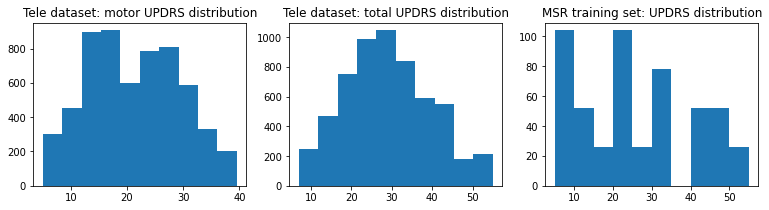

In [19]:
fig = plt.figure(figsize=(13, 3))
ax1 = fig.add_subplot(1, 3, 1)
ax1.hist(te['motor_UPDRS'])
ax1.set_title('Tele dataset: motor UPDRS distribution')
ax2 = fig.add_subplot(1, 3, 2)
ax2.hist(te['total_UPDRS'])
ax2.set_title('Tele dataset: total UPDRS distribution')
ax3 = fig.add_subplot(1, 3, 3)
ax3.hist(msr_train['UPDRS'][:int(len(msr_train['UPDRS'])/2)])
ax3.set_title('MSR training set: UPDRS distribution')

In [22]:
datasets = [("disease-classification", "Disease Classification", dc),
            ("multiple-sound-recoring-train", "Multiple Sound Recording Train", msr_train),
            ("multiple-sound-recoring-test", "Multiple Sound Recording Test", msr_test),
            ("telemonitoring", "Telemonitoring", te)]

msr_train_filename, msr_train_name, msr_train_data = datasets[1]

msr_columns = ['jitter_local', 'jitter_local_absolute',
               'jitter_rap', 'jitter_ppq5', 'jitter_ddp', 'shimmer_local',
               'shimmer_local_db', 'shimmer_apq3', 'shimmer_apq5', 
               'shimmer_apq11', 'shimmer_data', 'AC', 'NTH', 'HTN',
               'median_pitch', 'mean_pitch', 'standard_dev_pitch', 
               'min_pitch', 'max_pitch', 'num_pulses', 'num_periods',
               'mean_period','standard_dev_period', 'frac_locally_unvoiced_frames',
               'num_voice_breaks','degree_of_voice_breaks']


In [23]:
from sklearn import preprocessing
scaled_msr_train_data = pd.DataFrame(preprocessing.scale(msr_train_data[msr_columns]), columns = msr_columns)
from sklearn.decomposition import PCA
pca = PCA()
transformed_msr_train_data = pca.fit_transform(scaled_msr_train_data)




In [24]:
msr_test_filename, msr_test_name, msr_test_data = datasets[2]
scaled_msr_test_data = pd.DataFrame(preprocessing.scale(msr_test_data[msr_columns]), columns = msr_columns)
transformed_msr_test_data_forTesting = pca.fit_transform(scaled_msr_test_data)


In [25]:
def intrinsic_dimension(explained_variance_ratio_, recovered_variance=.99):
    dim = 0
    partial_var = 0
    for val in explained_variance_ratio_:
        # Update dim and va
        dim += 1
        partial_var += val
        if partial_var >= recovered_variance:
            break
    return dim

## SVM classifier


In [26]:
# Train a SVM classifier based on the PCA output
from sklearn import svm
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
import numpy as np


clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(transformed_msr_train_data, msr_train['class_info']) 
y_pred = clf_linear.predict(transformed_msr_test_data_forTesting)
print('Linear Accuracy: %f', accuracy_score(np.ones(y_pred.shape), y_pred))

clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(transformed_msr_train_data, msr_train['class_info']) 
y_pred = clf_rbf.predict(transformed_msr_test_data_forTesting)
print('RBF Accuracy: %f', accuracy_score(np.ones(y_pred.shape), y_pred))

clf_poly = svm.SVC(kernel='poly')
clf_poly.fit(transformed_msr_train_data, msr_train['class_info']) 
y_pred = clf_poly.predict(transformed_msr_test_data_forTesting)
print('Poly Accuracy: %f', accuracy_score(np.ones(y_pred.shape), y_pred))


Linear Accuracy: %f 0.47023809523809523
RBF Accuracy: %f 0.5178571428571429
Poly Accuracy: %f 0.7916666666666666


In [27]:
# Scale and Transform data
msrtrain_TE = pd.read_csv('./data/multiple-sound-recording/TE_MSRtrain_combined.csv')
msr_TE_columns = msrtrain_TE.columns[4:17]
scaled_msrtrain_TE = pd.DataFrame(preprocessing.scale(msrtrain_TE[msr_TE_columns]), columns = msr_TE_columns)
scaled_msrtrain_TE

pca = PCA()
pca.fit(scaled_msrtrain_TE)
n_components_msrTE = intrinsic_dimension(pca.explained_variance_ratio_)
print(f"Components making 99% of variance: {n_components_msrTE}")
pca = PCA(n_components=n_components_msrTE)
transformed_msrtrain_TE = pca.fit_transform(scaled_msrtrain_TE)

#MSR testing data
# select overlapping features
msr_test_data_TEmsr = msr_test_data[['jitter_local', 'jitter_local_absolute',
               'jitter_rap', 'jitter_ppq5', 'jitter_ddp', 'shimmer_local',
               'shimmer_local_db', 'shimmer_apq3', 'shimmer_apq5', 
               'shimmer_apq11', 'shimmer_data', 'NTH', 'HTN']]
# use same feature names
msr_test_data_TEmsr.columns = msrtrain_TE.columns[4:17]
#reduce dimensionality
pca = PCA(n_components=n_components_msrTE)
scaled_msr_test_data_TEmsr = pd.DataFrame(preprocessing.scale(msr_test_data_TEmsr[msr_TE_columns]), columns = msr_TE_columns)
transformed_msr_test_data_TEmsr_forTesting = pca.fit_transform(scaled_msr_test_data_TEmsr)

Components making 99% of variance: 8


### SVM classifier

In [28]:
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(transformed_msrtrain_TE, msrtrain_TE.Class) 
y_pred = clf_linear.predict(transformed_msr_test_data_TEmsr_forTesting)
print('Linear Accuracy:', 100*round(accuracy_score(np.ones(y_pred.shape), y_pred),3),'%')

clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(transformed_msrtrain_TE, msrtrain_TE.Class)  
y_pred = clf_rbf.predict(transformed_msr_test_data_TEmsr_forTesting)
print('RBF Accuracy:', 100*round(accuracy_score(np.ones(y_pred.shape), y_pred),3),'%')

clf_poly = svm.SVC(kernel='poly')
clf_poly.fit(transformed_msrtrain_TE, msrtrain_TE.Class) 
y_pred = clf_poly.predict(transformed_msr_test_data_TEmsr_forTesting)
print('Poly Accuracy:', 100*round(accuracy_score(np.ones(y_pred.shape), y_pred),3),'%')

Linear Accuracy: 100.0 %
RBF Accuracy: 100.0 %
Poly Accuracy: 97.0 %


## Predicting UPDRS Score
Parkinson's severity is scored on the UPDRS score. Since we have these scores for the MSR training dataset and the TE dataset, we wanted to test if we could predict these scores with random forest and ridge regression. Again, we will use the TE and MSR training combined set. This time, the data will be normalized (l2 norm) before using the supervised learning algorithms.

In [29]:
msr_TE_columns = msrtrain_TE.columns[4:17]
# l2 normalize each feature
normTEmsr = pd.DataFrame(preprocessing.normalize(msrtrain_TE[msr_TE_columns], norm='l2',axis=1), columns = msr_TE_columns)
labels = np.array(msrtrain_TE.UPDRS)

# now split into test (10%), and train (90%) sets since the MSR test data set does not have UPDRS scores
from sklearn.model_selection import train_test_split
train, test, trainy, testy = train_test_split(normTEmsr, labels, test_size = 0.1, random_state=3)

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=100, random_state=2, min_samples_split=3).fit(train, trainy)
predictions = reg.predict(test)
print('Mean Absolute Error:', round(metrics.mean_absolute_error(testy, predictions),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(testy, predictions)),2))

Mean Absolute Error: 8.97
Root Mean Squared Error: 11.37




## Feature description:
- Jitter: analysis of speaker's voic pitch
- Shimmer: analysis of speaker's voice amplitude


## Demo Feature Extraction From Sound Files
Things Extracted:
- mean pitch, stdev pitch, harmonicity mean, jitter(local), jitter(abs, local), jitter(rap), ppq5Jitter, jitter(ddp), shimmer(local), shimmer(localdb), shimmer(apq3), shimmer(apq5), shimmer(apq11), shimmer(dda), mean period, stdev period, num periods, HTN (aka HNR)
This to find:
- anything on voice breaks
- unvoiced frames
- min pitch
- max pitch
- NTH
- Autocorrelation (harmonicity)


In [32]:
# imports 
!pip install praat-parselmouth
import parselmouth
from parselmouth.praat import call
sound = parselmouth.Sound("data/mozillaClips/tstClip.mp3")

     |████████████████████████████████| 10.7 MB 4.6 MB/s 


In [33]:
f0min = 75
f0max = 600
unit = "Hertz"

pitch = call(sound, "To Pitch", 0.0, f0min, f0max) 
meanF0 = call(pitch, "Get mean", 0, 0, unit) 
stdevF0 = call(pitch, "Get standard deviation", 0 ,0, unit) 
harmonicity = call(sound, "To Harmonicity (cc)", 0.01, 75, 0.1, 1.0)
hnr = call(harmonicity, "Get mean", 0, 0)
pointProcess = call(sound, "To PointProcess (periodic, cc)", f0min, f0max)
localJitter = call(pointProcess, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3)
localabsoluteJitter = call(pointProcess, "Get jitter (local, absolute)", 0, 0, 0.0001, 0.02, 1.3)
rapJitter = call(pointProcess, "Get jitter (rap)", 0, 0, 0.0001, 0.02, 1.3)
ppq5Jitter = call(pointProcess, "Get jitter (ppq5)", 0, 0, 0.0001, 0.02, 1.3)
ddpJitter = call(pointProcess, "Get jitter (ddp)", 0, 0, 0.0001, 0.02, 1.3)
localShimmer =  call([sound, pointProcess], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
localdbShimmer = call([sound, pointProcess], "Get shimmer (local_dB)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
apq3Shimmer = call([sound, pointProcess], "Get shimmer (apq3)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
aqpq5Shimmer = call([sound, pointProcess], "Get shimmer (apq5)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
apq11Shimmer =  call([sound, pointProcess], "Get shimmer (apq11)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
ddaShimmer = call([sound, pointProcess], "Get shimmer (dda)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
#print(meanF0, stdevF0, hnr, localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, ddpJitter, localShimmer, localdbShimmer, apq3Shimmer, aqpq5Shimmer, apq11Shimmer, ddaShimmer)

df = pd.DataFrame(np.column_stack([meanF0, stdevF0, hnr, localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, ddpJitter, localShimmer, localdbShimmer, apq3Shimmer, aqpq5Shimmer, apq11Shimmer, ddaShimmer]),
                  columns=['mean pitch','standard deviation','hnr','local jitter','jitter_local_absolute','jitter_rap','jitter_ppq5','jitter_ddp','shimmer_local','shimmer_db','shimmer_apq3','shimmer_apq5','shimmer_apq11','shimmer_dda'])

236.00976740043308 193.9376143459164 9.724241207396748 0.04443067743077206 0.000195566041915513 0.022225449747266084 0.026388670031223513 0.06667634924179824 0.12730117762655563 1.3667099278389145 0.05367953813983153 0.08405807507080362 0.14708959662341275 0.16103861441949457


In [34]:
df

,mean pitch,standard deviation,hnr,local jitter,jitter_local_absolute,jitter_rap,jitter_ppq5,jitter_ddp,shimmer_local,shimmer_db,shimmer_apq3,shimmer_apq5,shimmer_apq11,shimmer_dda
0,236.009767,193.937614,9.724241,0.044431,0.000196,0.022225,0.026389,0.066676,0.127301,1.36671,0.05368,0.084058,0.14709,0.161039


In [35]:
meanPeriod = call(pointProcess, "Get mean period", 0, 0, 0.0001, 0.02, 1.3)
standardDeviation = call(pointProcess, "Get stdev period", 0, 0, 0.0001, 0.02, 1.3)
numperiods = call(pointProcess, "Get number of periods", 0, 0, 0.0001, 0.02, 1.3)


In [36]:
import pandas as pd
def loadData(i):
    filename = "data/mozillaClips/clips_" + str(i) + "_data.csv"
    print(filename)
    df = pd.read_csv(filename)
    consideredCols =['Jitter (local)',
       'Jitter (local, absolute)', 'Jitter (rap)', 'Jitter (ppq5)',
       'Jitter (ddp)', 'Shimmer (local)', 'Shimmer (local, dB)',
       'Shimmer (apq3)', 'Shimmer (apq5)', 'Shimmer (apq11)', 'Shimmer (dda)',
       'Mean autocorrelation', 'Mean noise-to-harmonics ratio',
       'Mean harmonics-to-noise ratio']
    #print(df[consideredCols])
    keyMap = {'Jitter (local)': "jitter_local",'Jitter (local, absolute)': "jitter_local_absolute", 
              'Jitter (rap)': "jitter_rap", 'Jitter (ppq5)': "jitter_ppq5",
               'Jitter (ddp)': "jitter_ddp", 'Shimmer (local)': "shimmer_local", 
               'Shimmer (apq3)': "shimmer_apq3", 'Shimmer (apq5)': "shimmer_apq5", 
              'Shimmer (apq11)': "shimmer_apq11", 'Shimmer (dda)': "shimmer_dda",
               'Mean autocorrelation': "AC", 'Mean noise-to-harmonics ratio': "NHR",
              'Shimmer (local, dB)': "shimmer_db",'Mean harmonics-to-noise ratio': "HNR"}
    df = df[~df.eq("--undefined--").any(1)]   
    df = df.rename(columns=keyMap)
    return df
    
loadData(0)

data/mozillaClips/clips_0_data.csv


,Median pitch,Mean pitch,Standard deviation,Minimum pitch,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,jitter_local,jitter_local_absolute,jitter_rap,jitter_ppq5,jitter_ddp,shimmer_local,shimmer_db,shimmer_apq3,shimmer_apq5,shimmer_apq11,shimmer_dda,AC,NHR,HNR,clip_name,age,gender
0,90.104,94.061,13.337,73.491,127.579,152,142,0.010721,0.001638,61.237,9,26.266,2.854,306.031E-6,1.276,1.559,3.827,13.739,1.221,5.965,10.340,14.402,17.894,0.777344,0.362033,7.098,common_voice_en_100034.mp3,fourties,male
1,87.592,94.238,22.812,75.009,215.604,282,263,0.010745,0.002062,56.698,17,30.209,3.037,326.325E-6,1.221,1.566,3.662,15.128,1.419,6.729,9.831,15.615,20.187,0.796216,0.302392,7.303,common_voice_en_100035.mp3,fourties,male
3,202.321,175.709,66.553,78.900,296.151,257,240,0.005709,0.002450,59.485,10,17.949,5.317,303.522E-6,2.761,3.502,8.284,20.180,1.788,8.561,11.598,27.529,25.682,0.711565,0.466305,4.583,common_voice_en_100037.mp3,fourties,male
4,124.070,149.956,64.956,75.674,282.571,525,485,0.006726,0.003008,47.051,22,28.641,3.971,267.126E-6,2.002,2.202,6.005,18.928,1.607,9.829,12.057,18.549,29.488,0.738547,0.440605,5.834,common_voice_en_100038.mp3,fourties,male
5,110.436,143.972,59.941,84.090,251.608,167,157,0.007095,0.002834,62.000,4,9.325,3.650,258.991E-6,1.659,2.175,4.976,18.528,1.502,9.536,12.733,12.336,28.609,0.752964,0.397612,6.054,common_voice_en_100039.mp3,fourties,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9009,120.444,129.127,28.211,87.192,193.739,243,240,0.007772,0.001646,66.726,2,3.688,2.024,157.318E-6,0.939,1.124,2.818,15.381,1.389,6.462,10.906,18.293,19.385,0.844554,0.225498,8.742,common_voice_en_99382.mp3,sixties,male
9010,111.449,118.542,39.933,88.908,298.068,318,304,0.008498,0.002044,47.898,10,16.439,2.458,208.907E-6,1.121,1.267,3.364,13.854,1.316,5.941,7.453,13.161,17.822,0.819470,0.271754,8.381,common_voice_en_99383.mp3,sixties,male
9011,101.852,102.519,8.900,85.133,118.944,98,96,0.009765,0.000863,68.652,1,2.160,1.787,174.532E-6,0.728,0.883,2.184,14.793,1.458,5.790,7.367,14.141,17.371,0.884698,0.158188,10.744,common_voice_en_99384.mp3,sixties,male
9012,166.123,162.835,29.303,121.209,260.299,185,178,0.006214,0.001059,65.598,3,5.913,3.015,187.350E-6,1.663,1.639,4.990,11.825,1.250,5.059,6.256,11.777,15.176,0.843761,0.251157,9.508,common_voice_en_99385.mp3,sixties,male
